In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print("seed",seed)

seed 1


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(-20625.3926)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 64


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 19051.46793  validloss 20869.94328±0.00000  bestvalidloss 20869.94328  last_update 0
train: iter 1  trainloss 2170.79988  validloss 1318.04865±0.00000  bestvalidloss 1318.04865  last_update 0
train: iter 2  trainloss 1511.67232  validloss 1207.23717±0.00000  bestvalidloss 1207.23717  last_update 0
train: iter 3  trainloss 1233.11430  validloss 1268.54904±0.00000  bestvalidloss 1207.23717  last_update 1
train: iter 4  trainloss 1103.43021  validloss 1092.06158±0.00000  bestvalidloss 1092.06158  last_update 0
train: iter 5  trainloss 979.53467  validloss 1016.78927±0.00000  bestvalidloss 1016.78927  last_update 0
train: iter 6  trainloss 900.03035  validloss 996.97883±0.00000  bestvalidloss 996.97883  last_update 0
train: iter 7  trainloss 874.28969  validloss 1019.47540±0.00000  bestvalidloss 996.97883  last_update 1
train: iter 8  trainloss 818.35685  validloss 1152.27263±0.00000  bestvalidloss 996.97883  last_update 2
train: iter 9  trainlos

train: iter 77  trainloss -665.31143  validloss -518.79138±0.00000  bestvalidloss -577.12133  last_update 1
train: iter 78  trainloss -668.87007  validloss -559.85938±0.00000  bestvalidloss -577.12133  last_update 2
train: iter 79  trainloss -569.13606  validloss -496.16539±0.00000  bestvalidloss -577.12133  last_update 3
train: iter 80  trainloss -548.35174  validloss -397.80622±0.00000  bestvalidloss -577.12133  last_update 4
train: iter 81  trainloss -579.36594  validloss -506.74560±0.00000  bestvalidloss -577.12133  last_update 5
train: iter 82  trainloss -581.23370  validloss -480.39468±0.00000  bestvalidloss -577.12133  last_update 6
train: iter 83  trainloss -625.04902  validloss -560.36255±0.00000  bestvalidloss -577.12133  last_update 7
train: iter 84  trainloss -581.67070  validloss -634.02512±0.00000  bestvalidloss -634.02512  last_update 0
train: iter 85  trainloss -647.99009  validloss -507.29285±0.00000  bestvalidloss -634.02512  last_update 1
train: iter 86  trainloss -6

train: iter 153  trainloss -877.18827  validloss -859.41870±0.00000  bestvalidloss -942.93669  last_update 2
train: iter 154  trainloss -1002.36432  validloss -725.06163±0.00000  bestvalidloss -942.93669  last_update 3
train: iter 155  trainloss -933.56057  validloss -956.26198±0.00000  bestvalidloss -956.26198  last_update 0
train: iter 156  trainloss -905.50056  validloss -943.16220±0.00000  bestvalidloss -956.26198  last_update 1
train: iter 157  trainloss -917.14723  validloss -838.17372±0.00000  bestvalidloss -956.26198  last_update 2
train: iter 158  trainloss -430.42976  validloss -264.48766±0.00000  bestvalidloss -956.26198  last_update 3
train: iter 159  trainloss -323.67264  validloss -234.00377±0.00000  bestvalidloss -956.26198  last_update 4
train: iter 160  trainloss -545.28695  validloss -398.16158±0.00000  bestvalidloss -956.26198  last_update 5
train: iter 161  trainloss -443.01045  validloss -634.32335±0.00000  bestvalidloss -956.26198  last_update 6
train: iter 162  t

train: iter 228  trainloss -1134.03569  validloss -1050.90223±0.00000  bestvalidloss -1113.74291  last_update 7
train: iter 229  trainloss -1034.00858  validloss -1092.70904±0.00000  bestvalidloss -1113.74291  last_update 8
train: iter 230  trainloss -1054.31550  validloss -860.96334±0.00000  bestvalidloss -1113.74291  last_update 9
train: iter 231  trainloss -1078.40790  validloss -1110.39591±0.00000  bestvalidloss -1113.74291  last_update 10
train: iter 232  trainloss -1157.31203  validloss -1067.70600±0.00000  bestvalidloss -1113.74291  last_update 11
train: iter 233  trainloss -861.94938  validloss -1049.64593±0.00000  bestvalidloss -1113.74291  last_update 12
train: iter 234  trainloss -960.95518  validloss -840.36923±0.00000  bestvalidloss -1113.74291  last_update 13
train: iter 235  trainloss -1129.16029  validloss -999.73260±0.00000  bestvalidloss -1113.74291  last_update 14
train: iter 236  trainloss -1078.94675  validloss -1107.94112±0.00000  bestvalidloss -1113.74291  last_u

train: iter 302  trainloss -1142.54653  validloss -939.55977±0.00000  bestvalidloss -1198.41346  last_update 4
train: iter 303  trainloss -1088.94950  validloss -1089.23735±0.00000  bestvalidloss -1198.41346  last_update 5
train: iter 304  trainloss -1166.01507  validloss -1024.50706±0.00000  bestvalidloss -1198.41346  last_update 6
train: iter 305  trainloss -1169.41665  validloss -708.24817±0.00000  bestvalidloss -1198.41346  last_update 7
train: iter 306  trainloss -1104.73692  validloss -1173.10681±0.00000  bestvalidloss -1198.41346  last_update 8
train: iter 307  trainloss -1087.36490  validloss -1013.85107±0.00000  bestvalidloss -1198.41346  last_update 9
train: iter 308  trainloss -1013.04187  validloss -1158.98261±0.00000  bestvalidloss -1198.41346  last_update 10
train: iter 309  trainloss -1004.27816  validloss -705.82992±0.00000  bestvalidloss -1198.41346  last_update 11
train: iter 310  trainloss -1181.05608  validloss -1077.48868±0.00000  bestvalidloss -1198.41346  last_up

train: iter 376  trainloss -1408.68877  validloss -1283.18788±0.00000  bestvalidloss -1302.56580  last_update 14
train: iter 377  trainloss -1211.11232  validloss -1270.05412±0.00000  bestvalidloss -1302.56580  last_update 15
train: iter 378  trainloss -1308.10352  validloss -1190.97033±0.00000  bestvalidloss -1302.56580  last_update 16
train: iter 379  trainloss -1136.82443  validloss -986.04239±0.00000  bestvalidloss -1302.56580  last_update 17
train: iter 380  trainloss -1332.05985  validloss -1162.93960±0.00000  bestvalidloss -1302.56580  last_update 18
train: iter 381  trainloss -1333.98477  validloss -1058.34519±0.00000  bestvalidloss -1302.56580  last_update 19
train: iter 382  trainloss -1337.38777  validloss -1255.60278±0.00000  bestvalidloss -1302.56580  last_update 20
train: iter 383  trainloss -1341.64946  validloss -1299.95299±0.00000  bestvalidloss -1302.56580  last_update 21
train: iter 384  trainloss -1373.64599  validloss -1147.73214±0.00000  bestvalidloss -1302.56580 

train: iter 450  trainloss -1414.81809  validloss -1328.54948±0.00000  bestvalidloss -1379.09911  last_update 9
train: iter 451  trainloss -1368.15752  validloss -1364.62549±0.00000  bestvalidloss -1379.09911  last_update 10
train: iter 452  trainloss -1176.57112  validloss -1263.97022±0.00000  bestvalidloss -1379.09911  last_update 11
train: iter 453  trainloss -1325.63845  validloss -1277.15471±0.00000  bestvalidloss -1379.09911  last_update 12
train: iter 454  trainloss -1380.34443  validloss -1210.66479±0.00000  bestvalidloss -1379.09911  last_update 13
train: iter 455  trainloss -1475.66150  validloss -1338.74859±0.00000  bestvalidloss -1379.09911  last_update 14
train: iter 456  trainloss -1348.48129  validloss -1385.88194±0.00000  bestvalidloss -1385.88194  last_update 0
train: iter 457  trainloss -1257.57549  validloss -1318.16056±0.00000  bestvalidloss -1385.88194  last_update 1
train: iter 458  trainloss -1441.15427  validloss -1319.76049±0.00000  bestvalidloss -1385.88194  l

train: iter 524  trainloss -1419.69538  validloss -1382.64006±0.00000  bestvalidloss -1431.20338  last_update 18
train: iter 525  trainloss -1276.06353  validloss -898.08007±0.00000  bestvalidloss -1431.20338  last_update 19
train: iter 526  trainloss -1429.54304  validloss -1350.21277±0.00000  bestvalidloss -1431.20338  last_update 20
train: iter 527  trainloss -1456.76238  validloss -1394.10492±0.00000  bestvalidloss -1431.20338  last_update 21
train: iter 528  trainloss -1467.65791  validloss -1254.05077±0.00000  bestvalidloss -1431.20338  last_update 22
train: iter 529  trainloss -1484.08736  validloss -1404.25675±0.00000  bestvalidloss -1431.20338  last_update 23
train: iter 530  trainloss -1473.42842  validloss -1326.18518±0.00000  bestvalidloss -1431.20338  last_update 24
train: iter 531  trainloss -1475.81087  validloss -1415.49784±0.00000  bestvalidloss -1431.20338  last_update 25
train: iter 532  trainloss -1372.12214  validloss -998.96211±0.00000  bestvalidloss -1431.20338  

train: iter 598  trainloss -1390.90664  validloss -1455.55924±0.00000  bestvalidloss -1477.34774  last_update 4
train: iter 599  trainloss -1495.92789  validloss -1343.18330±0.00000  bestvalidloss -1477.34774  last_update 5
train: iter 600  trainloss -1504.75745  validloss -1462.08475±0.00000  bestvalidloss -1477.34774  last_update 6
train: iter 601  trainloss -1413.26904  validloss -1331.35352±0.00000  bestvalidloss -1477.34774  last_update 7
train: iter 602  trainloss -1368.35705  validloss -1298.95597±0.00000  bestvalidloss -1477.34774  last_update 8
train: iter 603  trainloss -1568.03218  validloss -1404.22286±0.00000  bestvalidloss -1477.34774  last_update 9
train: iter 604  trainloss -1473.42069  validloss -1455.37630±0.00000  bestvalidloss -1477.34774  last_update 10
train: iter 605  trainloss -1256.52359  validloss -1216.56076±0.00000  bestvalidloss -1477.34774  last_update 11
train: iter 606  trainloss -1528.03094  validloss -1382.31678±0.00000  bestvalidloss -1477.34774  last

train: iter 671  trainloss -1497.39138  validloss -1443.80029±0.00000  bestvalidloss -1511.32547  last_update 14
train: iter 672  trainloss -1482.80707  validloss -1170.04080±0.00000  bestvalidloss -1511.32547  last_update 15
train: iter 673  trainloss -1390.63745  validloss -1430.40922±0.00000  bestvalidloss -1511.32547  last_update 16
train: iter 674  trainloss -1483.39736  validloss -1298.63796±0.00000  bestvalidloss -1511.32547  last_update 17
train: iter 675  trainloss -1578.21021  validloss -1357.05255±0.00000  bestvalidloss -1511.32547  last_update 18
train: iter 676  trainloss -1606.67966  validloss -1485.09853±0.00000  bestvalidloss -1511.32547  last_update 19
train: iter 677  trainloss -1601.35290  validloss -1511.71631±0.00000  bestvalidloss -1511.71631  last_update 0
train: iter 678  trainloss -1479.70980  validloss -1177.53616±0.00000  bestvalidloss -1511.71631  last_update 1
train: iter 679  trainloss -1500.30581  validloss -1426.31943±0.00000  bestvalidloss -1511.71631  

train: iter 744  trainloss -1455.12481  validloss -1446.71014±0.00000  bestvalidloss -1543.79199  last_update 56
train: iter 745  trainloss -1579.42091  validloss -1420.20763±0.00000  bestvalidloss -1543.79199  last_update 57
train: iter 746  trainloss -1631.14473  validloss -1461.29078±0.00000  bestvalidloss -1543.79199  last_update 58
train: iter 747  trainloss -1508.61916  validloss -1468.21527±0.00000  bestvalidloss -1543.79199  last_update 59
train: iter 748  trainloss -1593.25155  validloss -1508.29013±0.00000  bestvalidloss -1543.79199  last_update 60
train: iter 749  trainloss -1599.97404  validloss -1470.22588±0.00000  bestvalidloss -1543.79199  last_update 61
train: iter 750  trainloss -1613.27545  validloss -1394.01191±0.00000  bestvalidloss -1543.79199  last_update 62
train: iter 751  trainloss -1413.24755  validloss -1391.42672±0.00000  bestvalidloss -1543.79199  last_update 63
train: iter 752  trainloss -1620.97273  validloss -1413.03346±0.00000  bestvalidloss -1543.79199

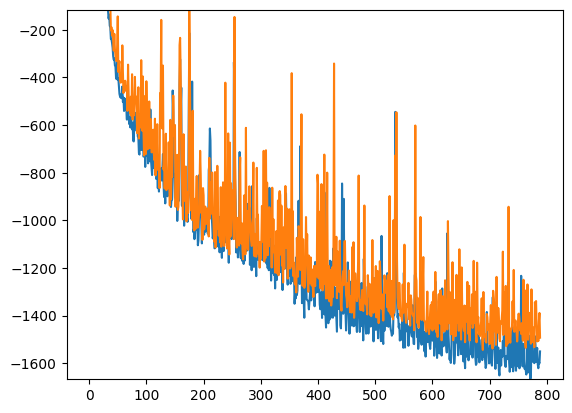

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([min(min(train_curve1),min(valid_curve1) ), 
          max(max(train_curve1[50:]),max(valid_curve1[50:])) ])
# plt.xlim([50, len(train_curve1)])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 5.82997  validloss 6.11904±0.00000  bestvalidloss 6.11904  last_update 0
train: iter 1  trainloss 5.37213  validloss 5.59965±0.00000  bestvalidloss 5.59965  last_update 0
train: iter 2  trainloss 4.99091  validloss 5.18558±0.00000  bestvalidloss 5.18558  last_update 0
train: iter 3  trainloss 4.67417  validloss 4.84149±0.00000  bestvalidloss 4.84149  last_update 0
train: iter 4  trainloss 4.42913  validloss 4.54976±0.00000  bestvalidloss 4.54976  last_update 0
train: iter 5  trainloss 4.19990  validloss 4.31969±0.00000  bestvalidloss 4.31969  last_update 0
train: iter 6  trainloss 4.00458  validloss 4.10862±0.00000  bestvalidloss 4.10862  last_update 0
train: iter 7  trainloss 3.83848  validloss 3.91816±0.00000  bestvalidloss 3.91816  last_update 0
train: iter 8  trainloss 3.67869  validloss 3.77259±0.00000  bestvalidloss 3.77259  last_update 0
train: iter 9  trainloss 3.52392  validloss 3.60283±0.00000  bestvalidloss 3.60283  last_update 0
train: iter 10  trai

train: iter 87  trainloss -1.55040  validloss -1.39655±0.00000  bestvalidloss -1.39655  last_update 0
train: iter 88  trainloss -1.50532  validloss -1.04251±0.00000  bestvalidloss -1.39655  last_update 1
train: iter 89  trainloss -1.51445  validloss -1.34743±0.00000  bestvalidloss -1.39655  last_update 2
train: iter 90  trainloss -1.52136  validloss -1.13846±0.00000  bestvalidloss -1.39655  last_update 3
train: iter 91  trainloss -1.53150  validloss -1.33884±0.00000  bestvalidloss -1.39655  last_update 4
train: iter 92  trainloss -1.53099  validloss -1.14175±0.00000  bestvalidloss -1.39655  last_update 5
train: iter 93  trainloss -1.54264  validloss -1.21768±0.00000  bestvalidloss -1.39655  last_update 6
train: iter 94  trainloss -1.54103  validloss -1.27978±0.00000  bestvalidloss -1.39655  last_update 7
train: iter 95  trainloss -1.56857  validloss -1.23281±0.00000  bestvalidloss -1.39655  last_update 8
train: iter 96  trainloss -1.57260  validloss -1.15322±0.00000  bestvalidloss -1.3

train: iter 167  trainloss -1.51470  validloss -1.19496±0.00000  bestvalidloss -1.46234  last_update 34
train: iter 168  trainloss -1.51104  validloss -1.23680±0.00000  bestvalidloss -1.46234  last_update 35
train: iter 169  trainloss -1.54362  validloss -1.32714±0.00000  bestvalidloss -1.46234  last_update 36
train: iter 170  trainloss -1.48868  validloss -1.24575±0.00000  bestvalidloss -1.46234  last_update 37
train: iter 171  trainloss -1.61418  validloss -1.37090±0.00000  bestvalidloss -1.46234  last_update 38
train: iter 172  trainloss -1.58022  validloss -1.26149±0.00000  bestvalidloss -1.46234  last_update 39
train: iter 173  trainloss -1.52151  validloss -1.27389±0.00000  bestvalidloss -1.46234  last_update 40
train: iter 174  trainloss -1.54038  validloss -1.27758±0.00000  bestvalidloss -1.46234  last_update 41
train: iter 175  trainloss -1.55579  validloss -1.22936±0.00000  bestvalidloss -1.46234  last_update 42
train: iter 176  trainloss -1.53526  validloss -1.36794±0.00000 

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([ 2.5174,  1.4688, -3.3910, -5.3142], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 66.98410  validloss 69.57251±0.00000  bestvalidloss 69.57251  last_update 0
train: iter 1  trainloss 50.62194  validloss 55.28785±0.00000  bestvalidloss 55.28785  last_update 0
train: iter 2  trainloss 36.81756  validloss 40.63443±0.00000  bestvalidloss 40.63443  last_update 0
train: iter 3  trainloss 27.60614  validloss 30.18450±0.00000  bestvalidloss 30.18450  last_update 0
train: iter 4  trainloss 21.60081  validloss 23.91598±0.00000  bestvalidloss 23.91598  last_update 0
train: iter 5  trainloss 17.54349  validloss 19.57892±0.00000  bestvalidloss 19.57892  last_update 0
train: iter 6  trainloss 14.60917  validloss 16.60128±0.00000  bestvalidloss 16.60128  last_update 0
train: iter 7  trainloss 12.39676  validloss 14.58467±0.00000  bestvalidloss 14.58467  last_update 0
train: iter 8  trainloss 10.80987  validloss 13.20180±0.00000  bestvalidloss 13.20180  last_update 0
train: iter 9  trainloss 9.69271  validloss 12.09242±0.00000  bestvalidloss 12.09242  last_

train: iter 83  trainloss 3.25398  validloss 6.42012±0.00000  bestvalidloss 6.08858  last_update 5
train: iter 84  trainloss 3.29773  validloss 6.23125±0.00000  bestvalidloss 6.08858  last_update 6
train: iter 85  trainloss 3.23740  validloss 6.47500±0.00000  bestvalidloss 6.08858  last_update 7
train: iter 86  trainloss 3.21118  validloss 6.58903±0.00000  bestvalidloss 6.08858  last_update 8
train: iter 87  trainloss 3.22076  validloss 6.35577±0.00000  bestvalidloss 6.08858  last_update 9
train: iter 88  trainloss 3.19500  validloss 6.18618±0.00000  bestvalidloss 6.08858  last_update 10
train: iter 89  trainloss 3.23405  validloss 5.89806±0.00000  bestvalidloss 5.89806  last_update 0
train: iter 90  trainloss 3.23823  validloss 6.24045±0.00000  bestvalidloss 5.89806  last_update 1
train: iter 91  trainloss 3.20508  validloss 6.54895±0.00000  bestvalidloss 5.89806  last_update 2
train: iter 92  trainloss 3.19111  validloss 6.43203±0.00000  bestvalidloss 5.89806  last_update 3
train: it

train: iter 166  trainloss 3.15722  validloss 6.82354±0.00000  bestvalidloss 5.89806  last_update 77
train: iter 167  trainloss 3.13279  validloss 6.63803±0.00000  bestvalidloss 5.89806  last_update 78
train: iter 168  trainloss 3.10183  validloss 6.46408±0.00000  bestvalidloss 5.89806  last_update 79
train: iter 169  trainloss 3.15021  validloss 6.83833±0.00000  bestvalidloss 5.89806  last_update 80
train: iter 170  trainloss 3.11251  validloss 6.36456±0.00000  bestvalidloss 5.89806  last_update 81
train: iter 171  trainloss 3.13539  validloss 6.27526±0.00000  bestvalidloss 5.89806  last_update 82
train: iter 172  trainloss 3.16361  validloss 6.52600±0.00000  bestvalidloss 5.89806  last_update 83
train: iter 173  trainloss 3.16821  validloss 6.58881±0.00000  bestvalidloss 5.89806  last_update 84
train: iter 174  trainloss 3.14437  validloss 6.41626±0.00000  bestvalidloss 5.89806  last_update 85
train: iter 175  trainloss 3.16861  validloss 6.16920±0.00000  bestvalidloss 5.89806  last_

In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-4.7190)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(-5.4964)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

2.159570651560175
tensor([-0.2419])
